<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    sumArr = np.ones((X[0].shape[0], 1))

    for i in range(len(X)):
        sumArr+=X[i]@V[i]
    
    return sumArr

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [10]:
def binarize(M, threshold=0.5):
    for i in range(len(M[0, :])):
        for k in range(len(M[:, 0])):
            if M[k, i] > threshold:
                M[k, i] = 1
                continue
            
            M[k, i] = 0
    
    return M

a = np.array([[1, 1, 2], [0.1, 0.5, 2]])
print(binarize(a, 0.5))

[[1. 1. 1.]
 [0. 0. 1.]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [18]:
def unique_rows(mat):
    M = list()
    
    for k in range(len(mat[:, 0])):
        S = set()
        for i in mat[k, :]:
            S.add(i)

        M.append(S)
    
    return M

def unique_columns(mat):
    M = list()
    
    for k in range(len(mat[0, :])):
        S = set()
        for i in mat[:, k]:
            S.add(i)

        M.append(S)
    
    return M

a = np.array([[1, 1, 2], [0.1, 0.5, 2]])
print(unique_columns(a))

[{0.1, 1.0}, {0.5, 1.0}, {2.0}]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

(array([1.]), array([-2.86009137, -1.86009137]), <BarContainer object of 1 artists>)
(array([1.]), array([-0.39395772,  0.60604228]), <BarContainer object of 1 artists>)
(array([1.]), array([-0.45194734,  0.54805266]), <BarContainer object of 1 artists>)
(array([1.]), array([-0.49106601,  0.50893399]), <BarContainer object of 1 artists>)
(array([1.]), array([-1.54045858, -0.54045858]), <BarContainer object of 1 artists>)
(array([1.]), array([0.48801899, 1.48801899]), <BarContainer object of 1 artists>)
(array([1.]), array([-1.77158013, -0.77158013]), <BarContainer object of 1 artists>)
(array([1.]), array([1.49982752, 2.49982752]), <BarContainer object of 1 artists>)


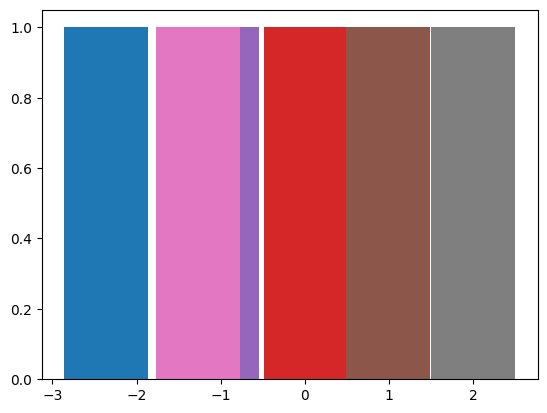

In [19]:
def whaaaaat(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))

    for i in range(len(matrix[:, 0])):
        row = matrix[i, :]

        meanRow = np.mean(row)
        varRow = np.var(row)

        print(plt.hist(meanRow, bins='auto', range=None, density=False))
        print(plt.hist(varRow, bins='auto', range=None, density=False))


    for j in range(len(matrix[0, :])):
        column = matrix[:, j]

        meanColumn = np.mean(column)
        varColumn = np.var(column)

        print(plt.hist(meanColumn, bins='auto', range=None, density=False))
        print(plt.hist(varColumn, bins='auto', range=None, density=False))

whaaaaat(2, 2)
    

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [25]:
def chess(m, n, a, b):
    matrix = np.ones((m, n))

    for j in range(n):
        for i in range(m):
            if (i+j)%2 == 0:
                matrix[i, j] = a
                continue

            matrix[i, j] = b

    return matrix

print(chess(4, 3, 5, 6))

[[5. 6. 5.]
 [6. 5. 6.]
 [5. 6. 5.]
 [6. 5. 6.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

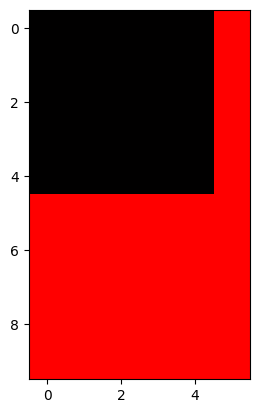

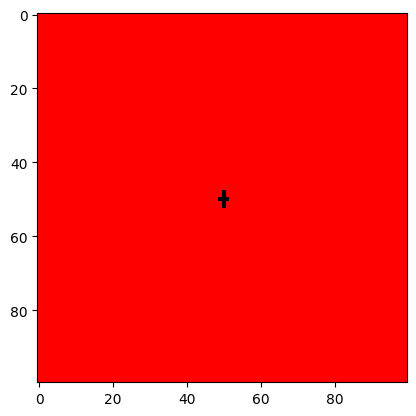

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    image[:a, :b] = rectangle_color

    plt.imshow(image)
    plt.show()

draw_rectangle(5, 5, 10, 6, [1, 0, 0], [255, 0, 0])

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    y_coords, x_coords = np.ogrid[:image.shape[0], :image.shape[1]]
    x_centered = x_coords - len(image[0, :])//2
    y_centered = y_coords - len(image[:, 0])//2

    ellipse_mask = (x_centered**2 / a**2 + y_centered**2 / b**2) <= 1

    image[ellipse_mask] = ellipse_color

    plt.imshow(image)
    plt.show()

draw_ellipse(1, 2, 100, 100, [1, 0, 0], [255, 0, 0])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def aaa(timeLine, p):
    arr = np.array(timeLine)
    meanArr = arr.mean(arr)
    varArr = arr.var(arr)
    stdArr = arr.std(arr)
    localMax = (arr[1:-1] > arr[:-2]) & (arr[1:-1] > arr[2:])
    localMaxIndices = np.where(localMax)[0] + 1
    localMaxValues = arr[localMaxIndices]

    localMin = (arr[1:-1] < arr[:-2]) & (arr[1:-1] < arr[2:])
    localMinIndices = np.where(localMin)[0] + 1
    localMinValues = arr[localMinIndices]

    skSrArr=[]
    for i in range(len(arr)-p+1):
        window = timeLine[i:i + p]
        windowAvg = sum(window) / p
        skSrArr.append(windowAvg)
        

    return meanArr, stdArr, varArr, localMaxIndices, localMaxValues, localMinIndices, localMinValues, skSrArr

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def OneHotEncodding(vector):
    result = list()
    for i in vector:
        array = list(i for i in range(max(vector)+1))
        for j in range(max(vector)+1):
            array[j]=0
            if i==j:
                array[i]=1
                continue
        
        result.append(array)
    
    return result

print(OneHotEncodding(np.array([0, 1, 4, 3])))
        


[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0]]
